In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from keras.optimizers import Adam,SGD,RMSprop
from keras.models import Model,Sequential
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D

In [3]:
data_dir = "C:\\Users\\Schmoopie\\Documents\\Emotion_Detection_CNN-main\\Emotion_Detection_CNN-main\\images"

In [4]:
os.listdir(data_dir)

['python', 'train', 'validation', 'venv']

In [4]:
train_path = data_dir+"\\train\\"
validation_path = data_dir+"\\validation\\"

In [6]:
os.listdir(validation_path)

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [6]:
os.listdir(validation_path+'angry')[0]

'10052.jpg'

In [7]:
angry_person = validation_path+'angry\\'+'10052.jpg'

In [8]:
from matplotlib.image import imread
image = imread(angry_person)

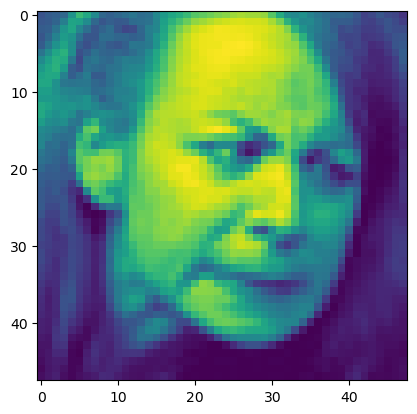

In [9]:
plt.imshow(image)

In [ ]:
image.shape

In [11]:
# Keeping the current image size
picture_size = 48

In [12]:
# Checking the max value of a pixel 
image.max()

227

In [12]:
from keras.preprocessing.image import ImageDataGenerator
batch_size  = 128

datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(data_dir+"\\train",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


test_set = datagen_val.flow_from_directory(data_dir+"\\validation",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [3]:
no_of_classes = 7

model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.2))

#2nd CNN layer
model.add(Conv2D(128,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.2))

#3rd CNN layer
model.add(Conv2D(256,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.2))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

# Fully connected layer 2nd layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

# Fully connected layer 2nd layer
model.add(Dense(32))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(no_of_classes, activation='softmax'))


# default optimizer (0.001)
opt = Adam(lr = 0.0001)
# Categorical crossentropy till multi classification
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       7

C:\Users\Schmoopie\anaconda3v2\envs\tensor\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [8]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=3, restore_best_weights=True)

In [40]:
# 3 epochs and max 64 nodes gave 0.4215 val_accuracy
# 6 epochs and up to 128 filters, but last val_accuraxy got from 0.5275 to 0.4734, restore weights might be good to implement
# it was almost the same (53%) as the tutorial video (not his best result which was around 70%)
# 4 epochs, third conv layer with 256 filters, restore best weights, 0.4679
# 20 epochs, otherwise same hyperparameters. Better result on first epoch without any change.
# 14 was made before early stopping, 0,5798, but plots show underfitting.
# After changing optimizer default value, the underfit got better.
results = model.fit(train_set,epochs=40,
                              validation_data=test_set,
                             callbacks=[early_stop])

Epoch 1/20
226/226 [==============================] - 142s 626ms/step - loss: 1.5662 - accuracy: 0.3976 - val_loss: 1.4644 - val_accuracy: 0.4423
Epoch 2/20
226/226 [==============================] - 132s 583ms/step - loss: 1.5141 - accuracy: 0.4182 - val_loss: 1.4279 - val_accuracy: 0.4584
Epoch 3/20
226/226 [==============================] - 132s 584ms/step - loss: 1.4744 - accuracy: 0.4314 - val_loss: 1.3960 - val_accuracy: 0.4735
Epoch 4/20
226/226 [==============================] - 130s 577ms/step - loss: 1.4412 - accuracy: 0.4478 - val_loss: 1.3854 - val_accuracy: 0.4791
Epoch 5/20
226/226 [==============================] - 129s 572ms/step - loss: 1.4146 - accuracy: 0.4573 - val_loss: 1.3717 - val_accuracy: 0.4841
Epoch 6/20
226/226 [==============================] - 128s 568ms/step - loss: 1.3820 - accuracy: 0.4672 - val_loss: 1.4288 - val_accuracy: 0.4689
Epoch 7/20
226/226 [==============================] - 132s 583ms/step - loss: 1.3583 - accuracy: 0.4838 - val_loss: 1.2964 -

In [45]:
from tensorflow.keras.models import load_model
model.save('model05582final.h5')

In [42]:
losses = pd.DataFrame(model.history.history)

<Axes: >

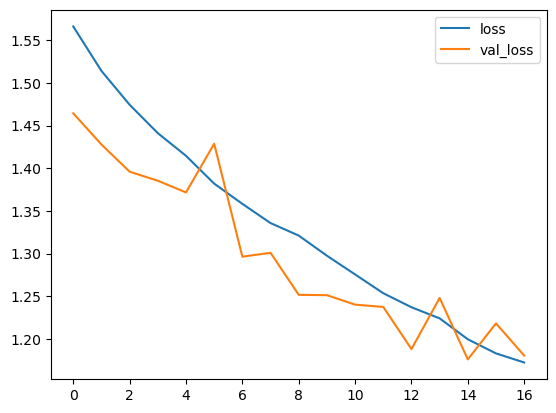

In [43]:
losses[['loss','val_loss']].plot()

<Axes: >

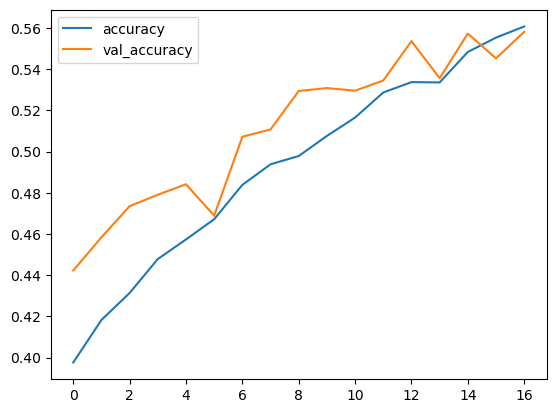

In [44]:
losses[['accuracy','val_accuracy']].plot()